In [1]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df_validData = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/Experiment_1_OpenEyes.cvs")


In [3]:
SaccadeSta = df_validData[df_validData['events']==1]
SaccadeEnd = df_validData[df_validData['events']==-1]
SaccadeEnd

Unnamed: 0   index  SubjectID  Session  SessionSubsection  \
49                49      49        365        1                  1   
71                71      71        365        1                  1   
83                83      83        365        1                  1   
89                89      89        365        1                  1   
109              109     109        365        1                  1   
...              ...     ...        ...      ...                ...   
14588785    15879293  114513        479        3                  3   
14588818    15879326  114546        479        3                  3   
14588831    15879339  114559        479        3                  3   
14588844    15879363  114583        479        3                  3   
14588861    15879380  114600        479        3                  3   

          timeStampDataPointEnd  eyeOpennessLeft  eyeOpennessRight  \
49                 1.635519e+09              1.0               1.0   
71                 1.635519e+09              1.0               1.0   
83                 1.635519e+09              1.0               1.0   
89                 1.635519e+09              1.0               1.0   
109                1.635519e+09              1.0               1.0   
...                         ...              ...               ...   
14588785           1.653311e+09              1.0               1.0   
14588818           1.653311e+09              1.0               1.0   
14588831           1.653311e+09              1.0               1.0   
14588844           1.653311e+09              1.0               1.0   
14588861           1.653311e+09              1.0               1.0   

          pupilDiameterMillimetersLeft  pupilDiameterMillimetersRight  ...  \
49                            2.919891                       3.136108  ...   
71                            2.713165                       3.081665  ...   
83                            2.704636                       2.942200  ...   
89                            2.498276                       3.145065  ...   
109                           2.772781                       3.262177  ...   
...                                ...                            ...  ...   
14588785                      4.542099                       4.506546  ...   
14588818                      4.517456                       4.547012  ...   
14588831                      4.699997                       4.519928  ...   
14588844                      5.130188                       4.567429  ...   
14588861                      4.901688                       4.316040  ...   

          combined_vel     thresh  isFix corrected_vel events    length  \
49          616.879190  44.460563    NaN    616.879190   -1.0  0.011408   
71           79.858834  44.460563    NaN     79.858834   -1.0  0.066960   
83           45.704280  44.460563    NaN     45.704280   -1.0  0.011406   
89          942.109209  44.460563    NaN    942.109209   -1.0  0.011408   
109         121.978151  44.460563    NaN    121.978151   -1.0  0.100192   
...                ...        ...    ...           ...    ...       ...   
14588785     64.727083  19.311127    NaN           NaN   -1.0  0.133424   
14588818     38.111023  19.311127    NaN     38.111023   -1.0  0.443208   
14588831     32.924190  19.311127    NaN           NaN   -1.0  0.111104   
14588844    113.302842  19.311127    NaN    113.302842   -1.0  0.343728   
14588861     95.610480  19.311127    NaN     95.610480   -1.0  0.022319   

            distance    avg_dist                  names  Collider_CategoricalN  
49               NaN         NaN          terrain_O.001             Background  
71         49.792206   49.792032           Building_162               Building  
83               NaN         NaN           Building_162               Building  
89               NaN         NaN       CollisionObject1             Background  
109        62.934858   62.934843           Building_161               Bui

In [4]:
SaccadeEnd = SaccadeEnd[SaccadeEnd['length']!=0] # deleting all 0-duration saccades, if any
SaccadeEnd = SaccadeEnd[SaccadeEnd['length']!=np.nan] # deleting all NaN saccades, if any
print("Nr. of SaccadeEnd:", len(SaccadeEnd.length)) 
print('Number of SaccadeSta:', len(SaccadeSta.length))
print("Max:",max(SaccadeEnd.length))
print('Min',min(SaccadeEnd.length))
print("Mean",np.mean(SaccadeEnd.length))
print('Median',np.nanmedian(SaccadeEnd.length))
print('SD:',np.std(SaccadeEnd.length))
print('MAD:',stats.median_abs_deviation(SaccadeEnd.length, scale=1, nan_policy='omit'))

Nr. of SaccadeEnd: 755453
Number of SaccadeSta: 601985
Max: 1098.148043870926
Min 0.0014882087707519
Mean 0.09429523705704917
Median 0.0555520057678222
SD: 1.4505930520200425
MAD: 0.033231973648071296


In [5]:
SaccadeEnd = SaccadeEnd[SaccadeEnd['length']!=0] # deleting all 0-duration saccades, if any
SaccadeEnd = SaccadeEnd[SaccadeEnd['length']!=np.nan] # deleting all NaN saccades, if any
print("Nr. of SaccadeEnd:", len(SaccadeEnd.length)) 
print('Number of SaccadeSta:', len(SaccadeSta.length))
print("Max:",max(SaccadeEnd.length))
print('Min',min(SaccadeEnd.length))
print("Mean",np.mean(SaccadeEnd.length))
print('Median',np.nanmedian(SaccadeEnd.length))
print('SD:',np.std(SaccadeEnd.length))
print('MAD:',stats.median_abs_deviation(SaccadeEnd.length, scale=1, nan_policy='omit'))

Nr. of SaccadeEnd: 755453
Number of SaccadeSta: 601985
Max: 1098.148043870926
Min 0.0014882087707519
Mean 0.09429523705704917
Median 0.0555520057678222
SD: 1.4505930520200425
MAD: 0.033231973648071296


1098.148043870926


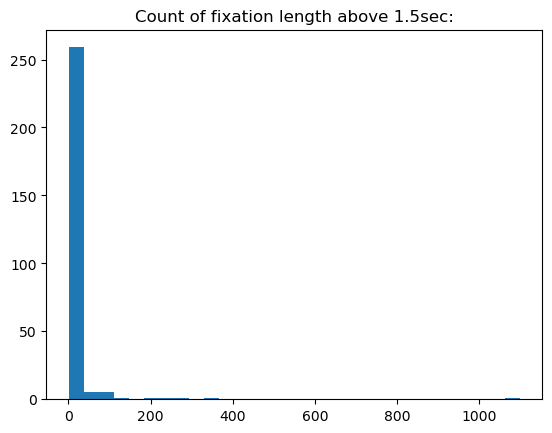

In [6]:
SaccadeEnd.loc[:,'length']#.astype('int64')
VeryLongSacs = SaccadeEnd[SaccadeEnd.loc[:,'length']>1.5]
plt.hist(VeryLongSacs.length, bins=30)
print(max(VeryLongSacs.length))
plt.title('Count of fixation length above 1.5sec:')
plt.show()

In [7]:
# --- Median, quantiles, and skew per subject ---
subjects = []
meds = []
p25s = []
p75s = []

for subject in SaccadeEnd['SubjectID'].unique():
    df_sub = SaccadeEnd[SaccadeEnd['SubjectID'] == subject]
    values = df_sub['length'].dropna()
    if not values.empty:
        med = np.nanmedian(values)
        p25 = np.nanquantile(values, 0.25)
        p75 = np.nanquantile(values, 0.75)
        subjects.append(subject)
        meds.append(med)
        p25s.append(p25)
        p75s.append(p75)

# --- Assemble summary table ---
df_SacDur = pd.DataFrame({
    'SubjectID': subjects,
    'Saccade_Duration_25%': p25s,
    'Saccade_Duration_med': meds,
    'Saccade_Duration_75%': p75s
})

# --- Bowley coefficient & IQR ---
df_SacDur['Saccade_Duration_DistQ1-Q3'] = df_SacDur['Saccade_Duration_75%'] - df_SacDur['Saccade_Duration_25%']
df_SacDur['Saccade_Duration_bowleyCoef'] = (
    (df_SacDur['Saccade_Duration_75%'] + df_SacDur['Saccade_Duration_25%'] - 2 * df_SacDur['Saccade_Duration_med']) /
    df_SacDur['Saccade_Duration_DistQ1-Q3']
)

# --- Drop unused quartiles if not needed later ---
df_SacDur = df_SacDur.drop(columns=['Saccade_Duration_25%', 'Saccade_Duration_75%'])

# --- Final DataFrame ---
df_SacDur


SubjectID  Saccade_Duration_med  Saccade_Duration_DistQ1-Q3  \
0         365              0.055551                    0.074896   
1        1754              0.047617                    0.064976   
2        2258              0.055553                    0.085807   
3        2361              0.058032                    0.079363   
4        2693              0.055548                    0.072417   
5        3246              0.055551                    0.085811   
6        3310              0.056049                    0.084320   
7        3572              0.055552                    0.074399   
8        3976              0.048112                    0.062497   
9        4176              0.055057                    0.073408   
10       4796              0.061008                    0.102176   
11       4917              0.056544                    0.081839   
12       5238              0.060513                    0.083823   
13       5531              0.055056                    0.072415   
14       5741              0.058032                    0.080353   
15       6642              0.055552                    0.072912   
16       7093              0.054954                    0.076881   
17       7264              0.055552                    0.078497   
18       7412              0.055552                    0.078864   
19       7842              0.066462                    0.093745   
20       8007              0.055552                    0.080352   
21       8469              0.052576                    0.072912   
22       8673              0.055551                    0.075390   
23       8695              0.055554                    0.070930   
24       9472              0.066464                    0.078367   
25       9502              0.055056                    0.085312   
26       9601              0.055552                    0.082336   
27        479              0.046129                    0.065968   
28       4597              0.055552                    0.072913   
29       9586              0.055552                    0.088786   

    Saccade_Duration_bowleyCoef  
0                      0.192057  
1                      0.282449  
2                      0.283210  
3                      0.337525  
4                      0.219279  
5                      0.283226  
6                      0.294122  
7                      0.226688  
8                      0.301596  
9                      0.229705  
10                     0.281561  
11                     0.333343  
12                     0.230764  
13                     0.164420  
14                     0.370359  
15                     0.210884  
16                     0.163949  
17                     0.241759  
18                     0.182408  
19                     0.153490  
20                     0.259262  
21                     0.183670  
22                     0.197413  
23                     0.272700  
24                     0.151889  
25                     0.267452  
26                     0.337341  
27                     0.293228  
28                     0.224493  
29                     0.262593

In [9]:
df_SacDur.to_csv("/Volumes/TwoTeras/PCA/Data_Sets/Experiment_1/SaccadeDuration.csv", index=False)